# Likert-Clusters v1.0
## A notebook for cluster analysis and visualization of data in likert scale

The assumption this notebook makes is that if you get a bunch of answers then most of your participants tend to respond in ways that fall into several similar groupings (clusters), and this alone tells you something about the target population's conceptions regarding your questions.

There are a number of methods designed for visualizing likert data (e.g. item response theory, categorical data analyses, multidimensional nonlinear descriptive analysis, fuzzy probability & statistics, and dissimilarity/similarity analyses which require strong knowledge in statistics. Luckily, by using fairly simple distance measures and cluster algorithms you can compare individual responses for each participant to better understand whether their answers are all over the place or tend to fall into groups (the latter is the preferred result). 

This notebook uses to apply K-means algorithm for likert data (questionaries with answers betwen 1 to 5) and then visualize the emerging clusters in various ways. Note: at the moment this notebook only divides the data to two clusters.

### Using this notebook

The input data should be a csv-style file, e.g: 

| id | question1 | question2 | question3 | question4 |
|----|-----------|-----------|-----------|-----------|
| 1  | 1         | 2         | 3         | 4         |
| 2  | 5         | 5         | 5         | 5         |
| 3  | 2         | 3         | 1         | 3         |

Header and left-most ids can be arbitrary and do not show in plots but they are expected to be included in data. Data cells should have values between 1-5. 

To use this notebook:
1. Insert data file into suitable location (e.g. the directory of the notebook).
2. Set below the filename, file_delimiter.
3. Set below the questions and their answer options at the far ends (answers 1 and 5) for purposes of showing them in plots at answers section.
4. Run each cell.

## Read data

In [2]:
# the data file
filename = "data/yle-election-2015-clean.csv"
file_delimiter = ";"


In [3]:
# read the data from file

import numpy as np
import pandas as pd

# read data and treat missing values
df = pd.read_csv(filename, delimiter=file_delimiter, encoding="utf8")

# prepare data as numpy arrays, assume that first column has some sort of row id
data = np.array(df.values[:,1:], dtype=int)

# prepare row and col counts for easy use
rows, cols = data.shape

print("Data has", rows, "samples with", cols, "features.")

Data has 1838 samples with 26 features.


In [78]:
# the questions
questions = ['Suomessa on liian helppo elää sosiaaliturvan varassa',
    'Kaupan ja muiden liikkeiden aukioloajat on vapautettava.',
    'Suomessa on siirryttävä perustuloon joka korvaisi nykyisen sosiaaliturvan vähimmäistason.',
    'Työntekijälle on turvattava lailla minimityöaika.',
    'Ansiosidonnaisen työttömyysturvan kestoa pitää lyhentää.',
    'Euron ulkopuolella Suomi pärjäisi paremmin.',
    'Ruoan verotusta on varaa kiristää.',
    'Valtion ja kuntien taloutta on tasapainotettava ensisijaisesti leikkaamalla menoja.',
    'Lapsilisiä on korotettava ja laitettava verolle.',
    'Suomella ei ole varaa nykyisen laajuisiin sosiaali- ja terveyspalveluihin.',
    'Nato-jäsenyys vahvistaisi Suomen turvallisuuspoliittista asemaa.',
    'Suomeen tarvitaan enemmän poliiseja.',
    'Maahanmuuttoa Suomeen on rajoitettava terrorismin uhan vuoksi.',
    'Venäjän etupiiripolitiikka on uhka Suomelle.',
    'Verkkovalvonnassa valtion turvallisuus on tärkeämpää kuin kansalaisten yksityisyyden suoja.',
    'Suomen on osallistuttava Isisin vastaiseen taisteluun kouluttamalla Irakin hallituksen joukkoja.',
    'Parantumattomasti sairaalla on oltava oikeus avustettuun kuolemaan.',
    'Terveys- ja sosiaalipalvelut on tuotettava ensijaisesti julkisina palveluina.',
    'Viranomaisten pitää puuttua lapsiperheiden ongelmiin nykyistä herkemmin.',
    'Vanhuksen ja hänen omaistensa vastuuta hoitokustannuksista on lisättävä.',
    'Kansalaisten oikeus terveyspalveluihin on tärkeämpää kuin kuntien itsehallinto.',
    'Ilmastonmuutoksen hillitseminen pitää asettaa teollisuuden kilpailukyvyn edelle.',
    'Geenimuunneltu ruoka on turvallista ihmiselle ja ympäristölle.',
    'Suomen pitää ottaa suurempi vastuu EU:n alueelle tulevista turvapaikanhakijoista.',
    'On aika luopua ajatuksesta, että koko Suomi on pidettävä asuttuna.',
    'Peruskoulun opetusryhmien koko on rajattava lailla esimerkiksi 20 oppilaaseen.']

# the far end answer options
answer_options = [('täysin eri mieltä', 'täysin samaa mieltä')] * rows


## Clustering

K-Means clustering is used to separate the data into clusters. Currently only clustering to two clusters is supported. 

The algorithm produces "cluster centers" in the data space, e.g.:

Cluster A: "2 3 2 2 2 3 3 3 2 3 2 4 3"

Cluster B: "4 4 3 2 3 2 4 4 4 4 4 4 2"

Also, it labels each sample into either cluster A or B (internally stored as either 0 or 1), e.g:

Labels: "A B A A A B B B B A B A"

### Hierarchical clustering

K-means expects the number of clusters as a parameter. Hierarchical clustering does not have this requirement of pre-determined clusters and we can use it as a help to decide how many natural clusters we want to look for.

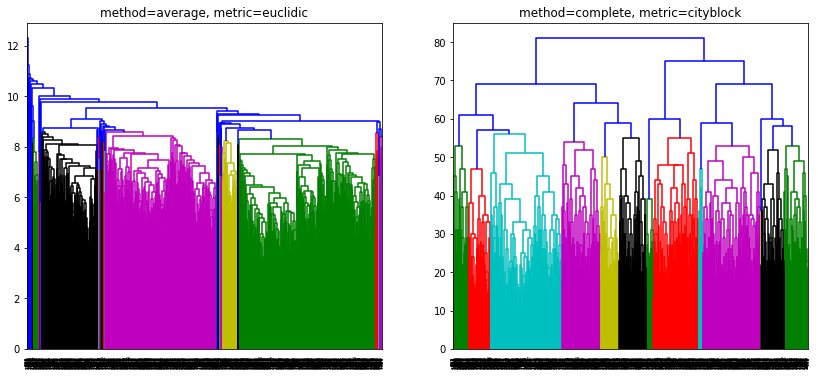

In [56]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Z1 = linkage(data, method='average', metric='euclidean')
Z2 = linkage(data, method='complete', metric='cityblock')

fig = plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
dendrogram(Z1)
plt.title("method=average, metric=euclidic")

plt.subplot(1,2,2)
dendrogram(Z2)
plt.title("method=complete, metric=cityblock")

plt.show()

In [5]:
from sklearn.cluster import KMeans

#from sklearn.cluster import AgglomerativeClustering
#ac = AgglomerativeClustering(n_clusters=2).fit(data)

k = KMeans(n_clusters=2).fit(data)

# index of the cluster each sample belongs to
labels = k.labels_
cluster_centers = np.round(k.cluster_centers_).astype(int)

print("For", len(data), "samples")
print()
print(cluster_centers, " are the cluster centers, and")
print()
print(labels, " are the labels for each sample.")

For 1838 samples

[[3 4 3 3 3 3 1 4 2 3 3 4 3 4 3 3 3 3 4 2 4 3 2 2 2 3]
 [2 3 4 4 2 3 1 2 3 2 2 4 2 3 2 2 4 5 4 2 4 4 2 3 2 4]]  are the cluster centers, and

[0 0 1 ... 0 0 0]  are the labels for each sample.


## Visualizing the answers

In [59]:
# set the columns to process
cols_to_visualize = [x for x in range(6)]

# set ylim for the maximum value to show in plots, adjust until it looks visually pleasing
Y_LIMIT = 1000
# also set the figsize below

In [57]:
import matplotlib.pyplot as plt
from math import ceil
from textwrap import wrap

%matplotlib inline

def plot_answers(answers, cols_to_visualize, answer_options, questions):
    plt.close()

    width = 2
    fig = plt.figure(figsize=(12, 24))
    fig.subplots_adjust(hspace=.5, top=1.85)

    counter = 1
    for i in cols_to_visualize:
        ax = fig.add_subplot(ceil(cols/width), width, i+1)
        #ax.set_yticks([0,4,8,12])
        ind = np.arange(1,6)
        ax.set_xticks(ind + 0.5)
        ax.set_xticklabels(ind)

        axes = plt.gca()
        axes.set_ylim([0,Y_LIMIT])
        axes.set_xlim([1,6])

        title = "\n".join(wrap("{}. {}".format(counter, questions[i]), 42))
        plt.title(title)
        counter += 1
        ax.yaxis.grid() 

        histdata = [data[labels == 0,i], data[labels == 1,i]]
        patches = plt.hist(histdata, color=['orange', 'green'], bins=[1,2,3,4,5,6], stacked=True, 
            histtype='bar', label=['Cluster A', 'Cluster B'])

        answerA, answerB = answer_options[i]
        answerA = "\n".join(wrap(answerA, 26))
        answerB = "\n".join(wrap(answerB, 26))

        ax.text(0.02, -0.12, answerA,
            verticalalignment='top', horizontalalignment='left',
            transform=ax.transAxes, fontsize=10)
        ax.text(0.98, -0.12, answerB,
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes, fontsize=10)

    plt.legend(bbox_to_anchor=(1.3, 0.5), loc='center')

    #plt.tight_layout()
    #plt.savefig('survey1.png', format='png', dpi=600, bbox_inches='tight')
    plt.show()


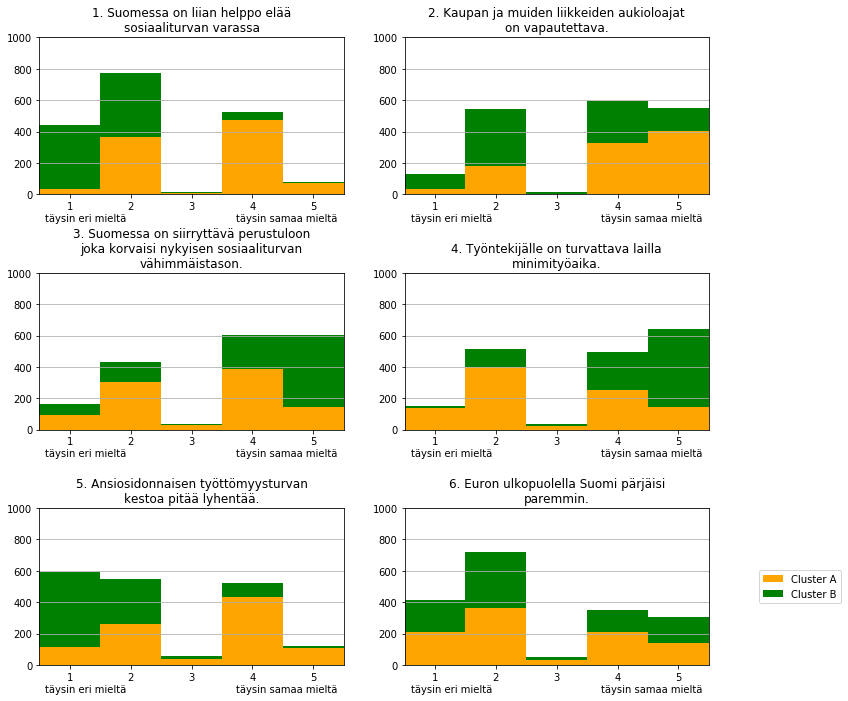

In [79]:
# visualize columns from_col to to_col
from_col = 0
to_col = 6
cols_to_visualize = [x for x in range(from_col, to_col)]

plot_answers(data, cols_to_visualize, answer_options, questions)


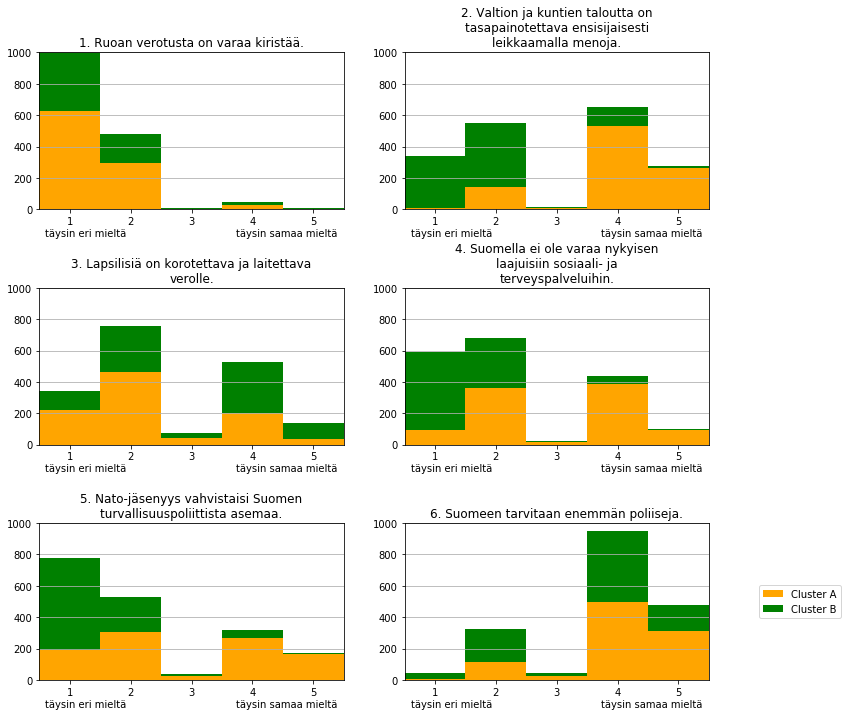

In [80]:
# visualize columns from_col to to_col
from_col = 6
to_col = 12
cols_to_visualize = [x for x in range(from_col, to_col)]

plot_answers(data, cols_to_visualize, answer_options, questions)


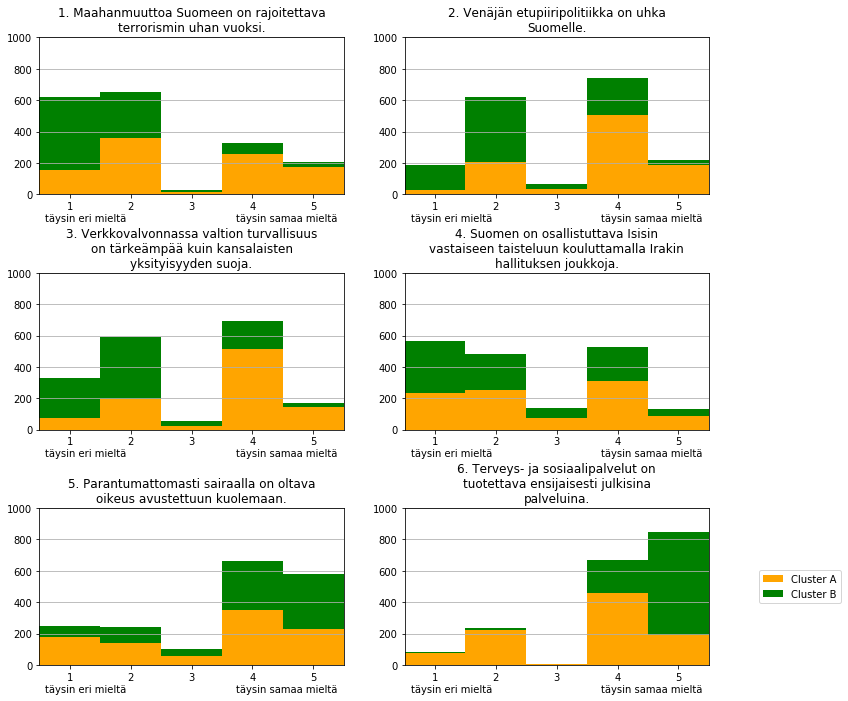

In [81]:
# visualize columns from_col to to_col
from_col = 12
to_col = 18
cols_to_visualize = [x for x in range(from_col, to_col)]

plot_answers(data, cols_to_visualize, answer_options, questions)


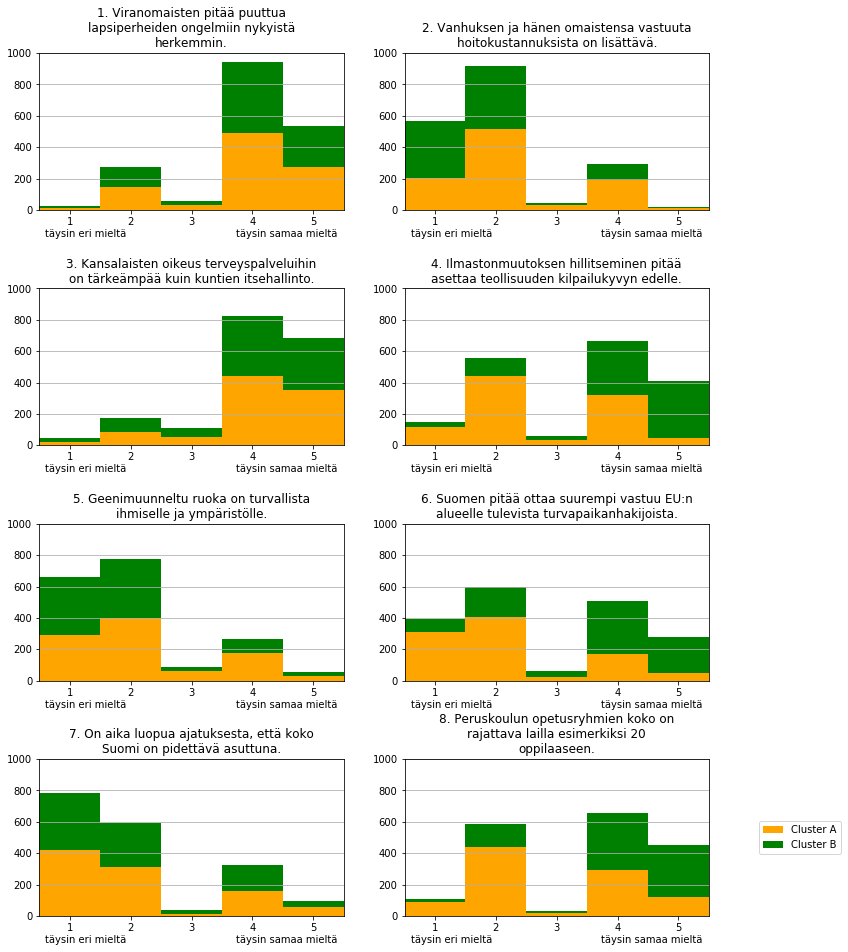

In [82]:
# visualize columns from_col to to_col
from_col = 18
to_col = 26
cols_to_visualize = [x for x in range(from_col, to_col)]

plot_answers(data, cols_to_visualize, answer_options, questions)


## Parallel coordinates

Parallel coordinates is another great way to visualize the data.

Samples are shown with dotted lines and cluster centers are shown with normal lines.

In [41]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import matplotlib.lines as mlines

def plot_parallel(answers, labels, cluster_centers):

    plt.close()

    plt.figure(figsize=(12,6))

    # plot answers
    df_answers = pandas.DataFrame(answers)
    df_answers = df_answers.assign(Group=labels)
    axes = parallel_coordinates(df_answers, 'Group', alpha=0.05, linewidth=2.0, linestyle=':', color=('gold', 'lightgreen'))

    # plot cluster centers
    df_clusters = pandas.DataFrame(cluster_centers)
    centers = np.array([0,1], dtype=int)
    df_clusters = df_clusters.assign(Clusters=centers)
    axes = parallel_coordinates(df_clusters, 'Clusters', alpha=0.9, linewidth=4.0, color=('orange', 'green'))

    # create legend
    c1 = mlines.Line2D([], [], color='orange', linestyle=':', alpha=0.5, label='Cluster A answers')
    c2 = mlines.Line2D([], [], color='green', linestyle=':', alpha=0.5, label='Cluster B answer')
    c3 = mlines.Line2D([], [], color='orange', linewidth=2.0, alpha=0.95, label='Cluster center A')
    c4 = mlines.Line2D([], [], color='green', linewidth=2.0, alpha=0.95, label='Cluster center B')
    plt.legend(handles=[c1,c2,c3,c4], fontsize=10)

    # create everything else
    rows, cols = answers.shape
    
    #plt.title('Parallel coordinates for questions and answers')
    plt.xlabel("{} questions".format(cols))
    plt.ylabel('Answers on scale from 1 to 5')
    
    axes.set_ylim([1,5])
    plt.yticks([1,2,3,4,5])
    col_names = [str(i) for i in range(1, cols+1)]
    plt.xticks(range(0, len(col_names)), col_names)

    plt.show()


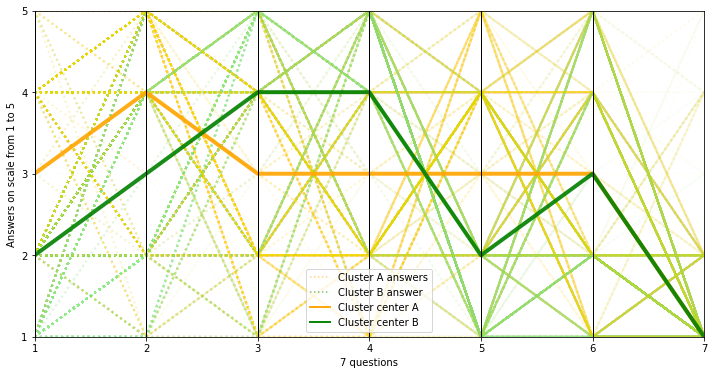

1. Suomessa on liian helppo elää sosiaaliturvan varassa
2. Kaupan ja muiden liikkeiden aukioloajat on vapautettava.
3. Suomessa on siirryttävä perustuloon joka korvaisi nykyisen sosiaaliturvan vähimmäistason.
4. Työntekijälle on turvattava lailla minimityöaika.
5. Ansiosidonnaisen työttömyysturvan kestoa pitää lyhentää.
6. Euron ulkopuolella Suomi pärjäisi paremmin.
7. Ruoan verotusta on varaa kiristää.


In [83]:
# visualize columns from_col to to_col
from_col = 0
to_col = 7

plot_parallel(data[:,from_col:to_col], labels, cluster_centers[:,from_col:to_col])
for idx, question in enumerate(questions[from_col:to_col]):
    print("{}. {}".format(idx+1, question))

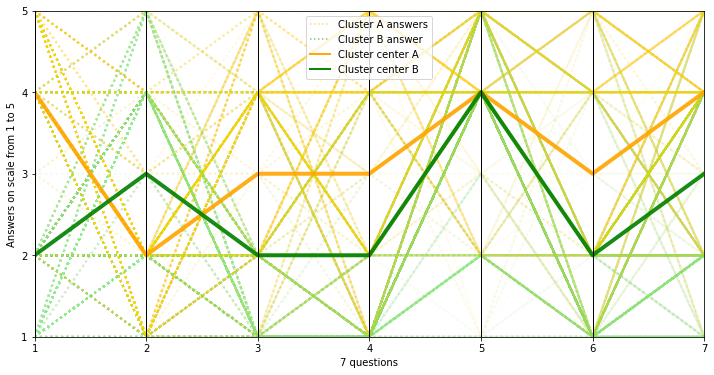

1. 134|Valtion ja kuntien taloutta on tasapainotettava ensisijaisesti leikkaamalla menoja.
2. 135|Lapsilisiä on korotettava ja laitettava verolle.
3. 136|Suomella ei ole varaa nykyisen laajuisiin sosiaali- ja terveyspalveluihin.
4. 137|Nato-jäsenyys vahvistaisi Suomen turvallisuuspoliittista asemaa.
5. 138|Suomeen tarvitaan enemmän poliiseja.
6. 139|Maahanmuuttoa Suomeen on rajoitettava terrorismin uhan vuoksi.
7. 140|Venäjän etupiiripolitiikka on uhka Suomelle.


In [43]:
# visualize columns from_col to to_col
from_col = 7
to_col = 14

plot_parallel(data[:,from_col:to_col], labels, cluster_centers[:,from_col:to_col])
for idx, question in enumerate(questions[from_col:to_col]):
    print("{}. {}".format(idx+1, question))

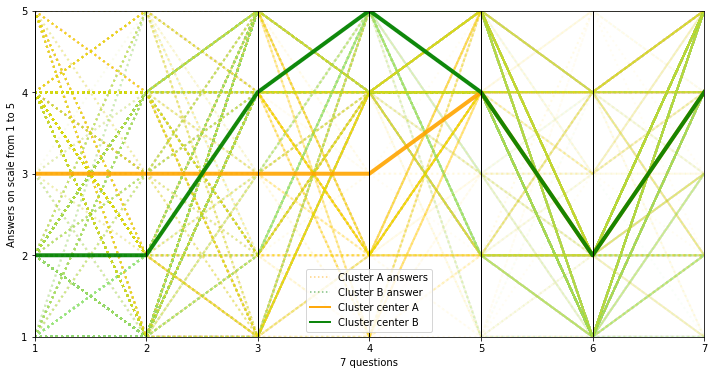

1. 141|Verkkovalvonnassa valtion turvallisuus on tärkeämpää kuin kansalaisten yksityisyyden suoja.
2. 142|Suomen on osallistuttava Isisin vastaiseen taisteluun kouluttamalla Irakin hallituksen joukkoja.
3. 143|Parantumattomasti sairaalla on oltava oikeus avustettuun kuolemaan.
4. 144|Terveys- ja sosiaalipalvelut on tuotettava ensijaisesti julkisina palveluina.
5. 145|Viranomaisten pitää puuttua lapsiperheiden ongelmiin nykyistä herkemmin.
6. 146|Vanhuksen ja hänen omaistensa vastuuta hoitokustannuksista on lisättävä.
7. 147|Kansalaisten oikeus terveyspalveluihin on tärkeämpää kuin kuntien itsehallinto.


In [44]:
# visualize columns from_col to to_col
from_col = 14
to_col = 21

plot_parallel(data[:,from_col:to_col], labels, cluster_centers[:,from_col:to_col])
for idx, question in enumerate(questions[from_col:to_col]):
    print("{}. {}".format(idx+1, question))

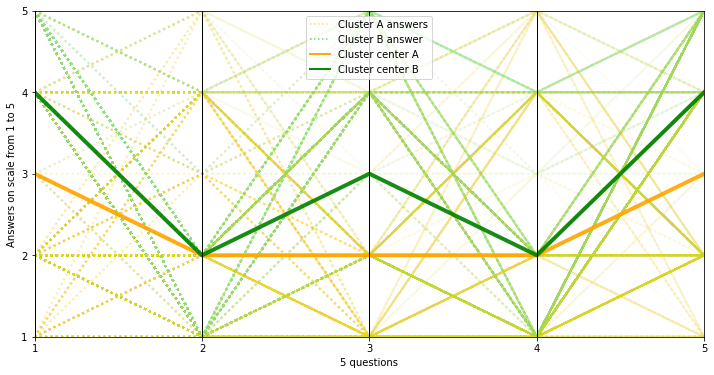

1. 148|Ilmastonmuutoksen hillitseminen pitää asettaa teollisuuden kilpailukyvyn edelle.
2. 149|Geenimuunneltu ruoka on turvallista ihmiselle ja ympäristölle.
3. 150|Suomen pitää ottaa suurempi vastuu EU:n alueelle tulevista turvapaikanhakijoista.
4. 151|On aika luopua ajatuksesta, että koko Suomi on pidettävä asuttuna.
5. 152|Peruskoulun opetusryhmien koko on rajattava lailla esimerkiksi 20 oppilaaseen.


In [45]:
# visualize columns from_col to to_col
from_col = 21
to_col = 28

plot_parallel(data[:,from_col:to_col], labels, cluster_centers[:,from_col:to_col])
for idx, question in enumerate(questions[from_col:to_col]):
    print("{}. {}".format(idx+1, question))

## Visualizing with PCA, MDS and t-SNE

Three methods are used here to reduce the dimensions to 2D for visualizing. Unfortunately reducing dimensions to two always loses some data. 

Each method tries to preserve some aspect: PCA preserves variance, MDS preserves distances and t-SNE preserves topology.

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

# apply PCA
pca = PCA(n_components=2)
Xpca = pca.fit_transform(data)

# apply MDS
mds = MDS(n_components=2)
Xmds = mds.fit_transform(data)

# apply t-SNE
tsne = TSNE(n_components=2, perplexity=5.0)
Xtsne = tsne.fit_transform(data)

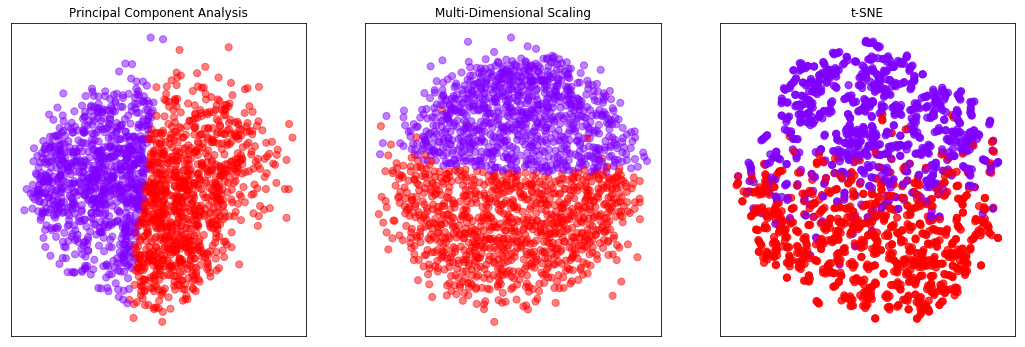

In [11]:
import matplotlib as mpl

# plot all three methods

#plt.close()

fig = plt.figure(1, figsize=(18,6))
#fig.suptitle("Cluster visualization", fontsize=12)
fig.subplots_adjust(top=0.85)

ax = plt.subplot(1,3,1)
ax.set_xticks([])
ax.set_yticks([])

plt.scatter(Xpca[:,0], Xpca[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('rainbow'))
plt.title("Principal Component Analysis")

ax = plt.subplot(1,3,2)
ax.set_xticks([])
ax.set_yticks([])

plt.title("Multi-Dimensional Scaling")
plt.scatter(Xmds[:,0], Xmds[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('rainbow'))

ax = plt.subplot(1,3,3)
ax.set_xticks([])
ax.set_yticks([])

plt.title("t-SNE")
plt.scatter(Xtsne[:,0], Xtsne[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('rainbow'))
plt.scatter(Xtsne[:,0], Xtsne[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('rainbow'))

plt.show()


## Results

This sections can be used to view the cluster of individual samples and distances.

Note that Group 0 is cluster A and group 1 is cluster B.

In [49]:

def manhattan_distance(answer1, answer2, answerDifference=4):
    # function to count manhattan distance of likert answers
    maxDistance = np.array([answerDifference]) * len(answer1)
    
    result = [abs(value1-value2) for i, (value1, value2) in enumerate(zip(answer1,answer2))]
    
    return (maxDistance - np.sum(result)) / maxDistance

distances = np.zeros([2, len(data)])

for i, answer in enumerate(data):
    for j, center in enumerate(cluster_centers):
        distances[j,i] = manhattan_distance(answer, center)

df = df.assign(Group=labels)
df = df.assign(ClusterA_distance=distances[0])
df = df.assign(ClusterB_distance=distances[1])

print(df[['Group','ClusterA_distance','ClusterB_distance']])


      Group  ClusterA_distance  ClusterB_distance
0         0           0.701923           0.644231
1         0           0.615385           0.653846
2         1           0.644231           0.721154
3         1           0.538462           0.730769
4         0           0.730769           0.711538
5         1           0.701923           0.798077
6         0           0.721154           0.740385
7         1           0.673077           0.826923
8         1           0.721154           0.875000
9         0           0.769231           0.730769
10        1           0.596154           0.750000
11        1           0.778846           0.798077
12        1           0.634615           0.807692
13        1           0.769231           0.807692
14        0           0.788462           0.750000
15        1           0.576923           0.750000
16        1           0.567308           0.740385
17        0           0.692308           0.615385
18        0           0.692308           0.576923
